#  Procesamiento de datos y análisis con `pandas`

Robert Johansson; traducción y material adicional por Pedro Gzlez. Rodelas

Código fuente para [Numerical Python - A Practical Techniques Approach for Industry](http://www.apress.com/9781484205549) (ISBN 978-1-484205-54-9).

El código fuente original en inglés puede descargarse de http://www.apress.com/9781484205549

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import numpy as np

In [3]:
import pandas as pd

## Objeto Series

In [4]:
s = pd.Series([909976, 8615246, 2872086, 2273305])
# Empecemos considerando una simple serie de datos enteros

In [6]:
s

0     909976
1    8615246
2    2872086
3    2273305
dtype: int64

In [7]:
type(s)
# Comprobemos el tipo general de este nuevo objeto

pandas.core.series.Series

In [8]:
s.dtype
# del que siempre podremos también obtener el tipo de datos que contiene

dtype('int64')

In [9]:
s.index
# y los índices que tiene

RangeIndex(start=0, stop=4, step=1)

In [10]:
s.values
# así como los valores correspondientes a cada uno de estos índices

array([ 909976, 8615246, 2872086, 2273305])

In [11]:
s.index = ["Estocolmo", "Londres", "Roma", "París"]
# Por otro lado, también podemos cambiar estos índices con 
# una denominación más descriptiva de los datos que contiene la serie 

In [12]:
s.name = "Población"
# así como darle un nombre concreto a la propia serie completa

In [13]:
# De manera que a partir de ahora se usarán estas nuevas denominaciones
# cuando preguntemos por la serie
s 

Estocolmo     909976
Londres      8615246
Roma         2872086
París        2273305
Name: Población, dtype: int64

In [14]:
# y podremos usar las nuevas denominaciones de los índices 
# para extraer el correspondiente valor 
s["Londres"]

8615246

Otra forma directa de haber realizado lo mismo de una sóla vez hubiera sido la siguiente:

In [15]:
s = pd.Series([909976, 8615246, 2872086, 2273305], 
              index=["Estocolmo", "Londres", "Roma", "París"], name="Población")

In [16]:
s["Londres"], s.Londres
# dos formas equivalentes de extraer el valor asociado a un índice descriptivo

(8615246, 8615246)

In [17]:
s.Estocolmo

909976

In [18]:
s[["París", "Roma"]]
# Ahora extraemos varios valores de la serie a la vez

París    2273305
Roma     2872086
Name: Población, dtype: int64

In [19]:
# y podemos calcular varios estadísticos de la serie completa
s.median(), s.mean(), s.std()
# como la mediana, la media, la desviación típica

(2572695.5, 3667653.25, 3399048.5005155364)

In [20]:
s.min(), s.max()
# así como muchos otros: el mínimo, máximo, etc.

(909976, 8615246)

In [21]:
s.quantile(q=0.25), s.quantile(q=0.5), s.quantile(q=0.75), s.quantile(q=0.90)
# aquí estamos extrayendo los percentiles y cuartíles que deseemos 
# (nótese que el correspondiente a q=0.5 coincide con la mediana).

(1932472.75, 2572695.5, 4307876.0, 6892298.0000000009)

In [22]:
# Por otro lado, se puede obtener un resumen casi todo esto con una sóla orden 
s.describe()

count    4.000000e+00
mean     3.667653e+06
std      3.399049e+06
min      9.099760e+05
25%      1.932473e+06
50%      2.572696e+06
75%      4.307876e+06
max      8.615246e+06
Name: Población, dtype: float64

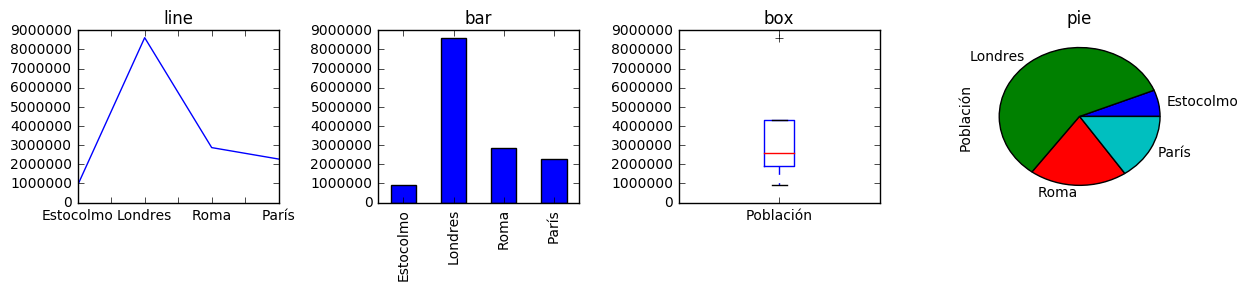

In [23]:
# Por supuesto que esto también lo podemos expresar gráficamente
# con distintas opciones y tipos de gráfico para ello.

fig, axes = plt.subplots(1, 4, figsize=(12, 3))

s.plot(ax=axes[0], kind='line', title="line")
s.plot(ax=axes[1], kind='bar', title="bar")
s.plot(ax=axes[2], kind='box', title="box")
s.plot(ax=axes[3], kind='pie', title="pie")

fig.tight_layout()
fig.savefig("series-plot.pdf")
fig.savefig("series-plot.png")

## Objeto DataFrame

Aparte del objeto de la clase Series (ideal para arrays unidimensionales), la otra clase dentro del paquete Pandas apropiada para representar cualquier tipo de array (fundamentalmente multidimensionales) es DataFrame; que a su vez puede ser vista como una colección de objetos de la clase Series, pero compartiendo un conjunto de índices común y un mismo título (o nombre).

In [24]:
df = pd.DataFrame([[909976, 8615246, 2872086, 2273305],
                   ["Suecia", "Reino Unido", "Italia", "Francia"]])

In [25]:
df # Vemos que estas instancias de la clase Series dentro del DataFrame 
# pueden organizarse por filas

,0,1,2,3
0,909976,8615246,2872086,2273305
1,Suecia,Reino Unido,Italia,Francia


In [26]:
df = pd.DataFrame([[909976, "Suecia"],
                   [8615246, "Reino Unido"], 
                   [2872086, "Italia"],
                   [2273305, "Francia"]])

In [27]:
df     # pero también las podríamos haber dispuesto por columnas 

,0,1
0,909976,Suecia
1,8615246,Reino Unido
2,2872086,Italia
3,2273305,Francia


In [28]:
# antes de indicar los índices descriptivos oportunos
df.index = ["Estocolmo", "Londres", "Roma", "París"]

In [29]:
# y los nombres de cada una de las instancias del objeto Series dentro del DataFrame
df.columns = ["Poblacion", "Estado"]

In [30]:
df    # Veámos cómo quedaría el DataFrame ya completo

,Poblacion,Estado
Estocolmo,909976,Suecia
Londres,8615246,Reino Unido
Roma,2872086,Italia
París,2273305,Francia


Todo esto se podría haber hecho de una vez, de la siguiente manera:

In [31]:
df = pd.DataFrame([[909976, "Suecia"],
                   [8615246, "Reino Unido"], 
                   [2872086, "Italia"],
                   [2273305, "Francia"]],
                  index=["Estocolmo", "Londres", "Roma", "París"],
                  columns=["Poblacion", "Estado"]);
df

,Poblacion,Estado
Estocolmo,909976,Suecia
Londres,8615246,Reino Unido
Roma,2872086,Italia
París,2273305,Francia


O bien de esta otra (usando un diccionario, con una entrada para cada columna):

In [32]:
df = pd.DataFrame({"Poblacion": [909976, 8615246, 2872086, 2273305],
                   "Estado": ["Suecia", "Reino Unido", "Italia", "Francia"]},
                  index=["Estocolmo", "Londres", "Roma", "París"]);
df  # Nótese que en este caso la ordenación de las columnas se hace automáticamente 
#     a partir de los nombres asignados a cada una de ellas.

,Estado,Poblacion
Estocolmo,Suecia,909976
Londres,Reino Unido,8615246
Roma,Italia,2872086
París,Francia,2273305


In [33]:
df.index     # Nótese también que por defecto el mapa de caracteres empleado para los índices
# es el UTF-8 o Unicode, lo cuál permite el uso de acentos y otros caracteres no ingleses.

Index(['Estocolmo', 'Londres', 'Roma', 'París'], dtype='object')

In [34]:
df.columns

Index(['Estado', 'Poblacion'], dtype='object')

In [35]:
df.values

array([['Suecia', 909976],
       ['Reino Unido', 8615246],
       ['Italia', 2872086],
       ['Francia', 2273305]], dtype=object)

In [36]:
df["Poblacion"]  
# df["Población"] también funcionaría con acento, pero no con "df.Población" 

Estocolmo     909976
Londres      8615246
Roma         2872086
París        2273305
Name: Poblacion, dtype: int64

In [37]:
type(_)    # Vemos que tipo general de estos objetos sigue siendo de la clase Series

pandas.core.series.Series

In [38]:
type(df["Poblacion"]) 
# "type(df.Población)" daría el mismo resultado en caso de no tener acentos

pandas.core.series.Series

In [39]:
df["Poblacion"].Estocolmo
# "df.Poblacion.Estocolmo" también daría el mismo resultado

909976

In [40]:
type(df.ix) # Véase como el tipo utilizado es un objeto especial de la clase _IXIndexer

pandas.core.indexing._IXIndexer

In [41]:
df.ix["Estocolmo"]  # De esta manera obtenemos la serie completa asociada al índice "Estocolmo"

Estado       Suecia
Poblacion    909976
Name: Estocolmo, dtype: object

In [42]:
type(df.ix["Estocolmo"])   # que por supuesto es una instancia de la clase Series de Pandas

pandas.core.series.Series

In [43]:
df.ix[["París", "Roma"]]   # Aquí obtenemos a la vez las series indicadas

,Estado,Poblacion
París,Francia,2273305
Roma,Italia,2872086


In [44]:
#  Y si sólo queremos obtener la "Población" de ambas series:
df.ix[["París", "Roma"], "Poblacion"]    

París    2273305
Roma     2872086
Name: Poblacion, dtype: int64

In [45]:
df.ix["París", "Poblacion"]   # En este caso sólo le pedimos el valor de una de ellas

2273305

In [46]:
df.mean()    # Aquí lo que queremos obtener es la media de todas las columnas numéricas

Poblacion    3667653.25
dtype: float64

In [47]:
df.info()    # Ahora le solicitamos información global del DataFrame

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, Estocolmo to París
Data columns (total 2 columns):
Estado       4 non-null object
Poblacion    4 non-null int64
dtypes: int64(1), object(1)
memory usage: 96.0+ bytes


In [48]:
df.dtypes    # los tipos de datos de las distintas Series que contiene

Estado       object
Poblacion     int64
dtype: object

In [49]:
df.head()    # Esta orden sería muy útil en caso de DataFrames con Series bastante grandes

,Estado,Poblacion
Estocolmo,Suecia,909976
Londres,Reino Unido,8615246
Roma,Italia,2872086
París,Francia,2273305


In [50]:
 !head -n5 ./european_cities.csv  
# esto sólo funcionaría en sistema tipo Unix y nos
# proporcionaría las cinco primeras líneas del fichero

Rank,City,State,Population,Date of census/estimate
1,London[2], United Kingdom,"8,615,246",1 June 2014
2,Berlin, Germany,"3,437,916",31 May 2014
3,Madrid, Spain,"3,165,235",1 January 2014
4,Rome, Italy,"2,872,086",30 September 2014


## Conjuntos de datos de mayor tamaño

La ventaja fundamental de usar el paquete Pandas se hace más evidente cuando se trabaja con conjuntos de datos mucho más complejos que los ejemplos anteriores. De hecho Pandas proporciona varias formas de poder leer o extraer dichos datos a partir de ficheros con diferentes formatos. Uno de los más extendidos es el formato CSV (de "Comma Separated Values" en inglés) y el procedimiento "read-csv" de Pandas permite realizar la correspondiente lectura a partir de un fichero o URL con bastante flexibilidad y versatilidad (ejecutar "help(pd.read_csv)" para consultar alguna de sus muchas posibilidades).

In [51]:
help(pd.read_csv)

Help on function read_csv in module pandas.io.parsers:

read_csv(filepath_or_buffer, sep=',', delimiter=None, header='infer', names=None, index_col=None, usecols=None, squeeze=False, prefix=None, mangle_dupe_cols=True, dtype=None, engine=None, converters=None, true_values=None, false_values=None, skipinitialspace=False, skiprows=None, skipfooter=None, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=False, infer_datetime_format=False, keep_date_col=False, date_parser=None, dayfirst=False, iterator=False, chunksize=None, compression='infer', thousands=None, decimal=b'.', lineterminator=None, quotechar='"', quoting=0, escapechar=None, comment=None, encoding=None, dialect=None, tupleize_cols=False, error_bad_lines=True, warn_bad_lines=True, skip_footer=0, doublequote=True, delim_whitespace=False, as_recarray=False, compact_ints=False, use_unsigned=False, low_memory=True, buffer_lines=None, memory_map=False, float_precision

In [52]:
df_pop = pd.read_csv("european_cities.csv", delimiter=",", encoding="utf-8", header=0)
#  En este caso hubiera valido con    "df_pop = pd.read_csv("european_cities.csv")"

In [53]:
df_pop.head()    # Evidentemente, mostrando una pequeña parte del DataFrame creado a partir
# del fichero que acabamos de leer, nos hacemos una idea clara de lo que contiene, 
# antes de plantearnos cualquier análisis posterior.

,Rank,City,State,Population,Date of census/estimate
0,1,London[2],United Kingdom,"8,615,246",1 June 2014
1,2,Berlin,Germany,"3,437,916",31 May 2014
2,3,Madrid,Spain,"3,165,235",1 January 2014
3,4,Rome,Italy,"2,872,086",30 September 2014
4,5,Paris,France,"2,273,305",1 January 2013


In [54]:
df_pop.info()    # Aquí tenemos la información general del DataFrame leído a partir del fichero.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 5 columns):
Rank                       105 non-null int64
City                       105 non-null object
State                      105 non-null object
Population                 105 non-null object
Date of census/estimate    105 non-null object
dtypes: int64(1), object(4)
memory usage: 4.2+ KB


A partir de dicha información y de la muestra del DataFrame mostrado más arriba, podemos plantearnos ya cualquier transformación o reordenación de columnas que necesitemos para empezar nuestro pormenorizado análisis. A su vez, también podemos crear nuevas columnas, borrarlas (con el comando "del") o actualizar y recalcular otras de nuestro DataFrame, simplemente asignándole nuevas instancias u objetos de la clase Series.

In [55]:
# Veamos por ejemplo, cómo obtener los cinco primeros valores de la columna correspondiente al
# estado ("State" en inglés):
df_pop["State"].values[:5]

array([' United Kingdom', ' Germany', ' Spain', ' Italy', ' France'], dtype=object)

Vamos ahora a crear una nueva columna (o instancia de la clase Series) incluyendo el valor numérico entero de la población de las ciudades, a partir del correspondiente string, pero sin incluir ninguna coma o signo de puntuación adicional.

In [56]:
# Para ello aplicaremos una función sin nombre (de tipo lambda) a cada elemento de la columna
# correspondiente, eliminando las comas que separan los millares y unidades de millón.
df_pop["NumericPopulation"] = df_pop.Population.apply(lambda x: int(x.replace(",", "")))

In [57]:
# En cuanto a la columna correspondiente al Estado ("State" en inglés), 
# vamos a eliminar cualquier espacio extra, ya sea al principio o final del nombre,
# mediante el método "strip", aplicable a strings.
df_pop["State"] = df_pop["State"].apply(lambda x: x.strip())

In [58]:
df_pop.head()

,Rank,City,State,Population,Date of census/estimate,NumericPopulation
0,1,London[2],United Kingdom,"8,615,246",1 June 2014,8615246
1,2,Berlin,Germany,"3,437,916",31 May 2014,3437916
2,3,Madrid,Spain,"3,165,235",1 January 2014,3165235
3,4,Rome,Italy,"2,872,086",30 September 2014,2872086
4,5,Paris,France,"2,273,305",1 January 2013,2273305


In [59]:
df_pop.dtypes
# Inspeccionando los tipos de dato de cada una de las Series (o columnas), comprobamos que 
# la nueva columna creada "NumericPopulation" efectivamente es de tipo entero, mientras que
# la otra Serie usada para su creación, "Population", permanece inalterada.

Rank                        int64
City                       object
State                      object
Population                 object
Date of census/estimate    object
NumericPopulation           int64
dtype: object

In [60]:
# Si ahora queremos cambiar el índice numérico (ordinal) por defecto que tiene el DataFrame
# y queremos usar en su lugar el nombre de la ciudad, lo podemos indicar con el procedimiento
# "set_index" como sigue:
df_pop2 = df_pop.set_index("City")

In [61]:
# Y ahora podemos realizar una nueva ordenación, a partir de este nuevo índice
df_pop2 = df_pop2.sort_index()

In [62]:
df_pop2.head()    # Veámos aquí el resultado de esta nueva ordenación del DataFrame

,Rank,State,Population,Date of census/estimate,NumericPopulation
City,,,,,
Aarhus,92,Denmark,"326,676",1 October 2014,326676
Alicante,86,Spain,"334,678",1 January 2012,334678
Amsterdam,23,Netherlands,"813,562",31 May 2014,813562
Antwerp,59,Belgium,"510,610",1 January 2014,510610
Athens,34,Greece,"664,046",24 May 2011,664046


In [63]:
# A continuación vamos a establecer otro índice jerárquico, con doble entrada, 
# el estado y la ciudad, indicando que la ordenación se haga teniendo en cuenta 
# el estado como índice principal 
df_pop3 = df_pop.set_index(["State", "City"]).sortlevel(0)

In [64]:
df_pop3.head(7)    # Veámos el efecto de esta nueva clasificación visualizando 
# los 7 primeros elementos

Rank Population Date of census/estimate  \
State    City                                                    
Austria  Vienna           7  1,794,770          1 January 2015   
Belgium  Antwerp         59    510,610          1 January 2014   
         Brussels[17]    16  1,175,831          1 January 2014   
Bulgaria Plovdiv         84    341,041        31 December 2013   
         Sofia           14  1,291,895        14 December 2014   
         Varna           85    335,819        31 December 2013   
Croatia  Zagreb          24    790,017           31 March 2011   

                       NumericPopulation  
State    City                             
Austria  Vienna                  1794770  
Belgium  Antwerp                  510610  
         Brussels[17]            1175831  
Bulgaria Plovdiv                  341041  
         Sofia                   1291895  
         Varna                    335819  
Croatia  Zagreb                   790017

In [65]:
df_pop3.ix["Sweden"]    # Extraemos ahora tan sólo los resultados correspondientes 
# a las ciudades del estado de Suecia

,Rank,Population,Date of census/estimate,NumericPopulation
City,,,,
Gothenburg,53,"528,014",31 March 2013,528014
Malmö,102,"309,105",31 March 2013,309105
Stockholm,20,"909,976",31 January 2014,909976


In [66]:
df_pop3.ix[("Sweden", "Gothenburg")]    # Si por el contrario tan sólo estamos interesados 
# en una ciudad sueca en concreto, usaremos este índice doble para extraer sus valores. 

Rank                                  53
Population                       528,014
Date of census/estimate    31 March 2013
NumericPopulation                 528014
Name: (Sweden, Gothenburg), dtype: object

In [67]:
# Mostremos ahora los 20 primeros elementos, indizados a partir de la ciudad, pero ordenados
# a partir de un índice jerárquico compuesto del estado y la población (esta última de manera
# creciente).
# df_pop.set_index("City").sort(["State", "NumericPopulation"], ascending=[False, True]).head(20) # Python 2
df_pop.set_index("City").sort_values(["State", "NumericPopulation"], ascending=[False, True]).head(20) # Python 3

,Rank,State,Population,Date of census/estimate,NumericPopulation
City,,,,,
Nottingham,103,United Kingdom,"308,735",30 June 2012,308735
Wirral,97,United Kingdom,"320,229",30 June 2012,320229
Coventry,94,United Kingdom,"323,132",30 June 2012,323132
Wakefield,91,United Kingdom,"327,627",30 June 2012,327627
Leicester,87,United Kingdom,"331,606",30 June 2012,331606
Cardiff,80,United Kingdom,"348,493",30 June 2012,348493
Bristol,69,United Kingdom,"432,451",30 June 2012,432451
Liverpool,64,United Kingdom,"469,690",30 June 2012,469690
Edinburgh,60,United Kingdom,"495,360",30 June 2011,495360


In [68]:
# Comprueba cómo cambia radicalmente el resultado de indicar una ordenación distinta
# ya sea en cuanto al nombre del estado o la población de la ciudad correspondiente
# df_pop.set_index("City").sort(["State", "NumericPopulation"], ascending=[True, False]).head(20) # Python 2
df_pop.set_index("City").sort_values(["State", "NumericPopulation"], ascending=[True, False]).head(20)

,Rank,State,Population,Date of census/estimate,NumericPopulation
City,,,,,
Vienna,7,Austria,"1,794,770",1 January 2015,1794770
Brussels[17],16,Belgium,"1,175,831",1 January 2014,1175831
Antwerp,59,Belgium,"510,610",1 January 2014,510610
Sofia,14,Bulgaria,"1,291,895",14 December 2014,1291895
Plovdiv,84,Bulgaria,"341,041",31 December 2013,341041
Varna,85,Bulgaria,"335,819",31 December 2013,335819
Zagreb,24,Croatia,"790,017",31 March 2011,790017
Prague,15,Czech Republic,"1,246,780",1 January 2013,1246780
Brno,76,Czech Republic,"378,327",1 January 2013,378327


In [69]:
# Es frecuente tener interés en conocer cuantos valores aparecen asociados a cada una
# de las categorias de cada columna, que pueden ser contabilizados mediante el procedimiento:
# "value_counts()" 
city_counts = df_pop.State.value_counts();
city_counts # Veámos en este caso las ciudades incluidas de cada uno de los paises considerados
# Se trata de una nueva instancia de la clase Series

Germany                     19
United Kingdom              16
Spain                       13
Italy                       10
Poland                      10
France                       5
Netherlands                  4
Sweden                       3
Bulgaria                     3
Romania                      3
Greece                       2
Denmark                      2
Belgium                      2
Lithuania                    2
Czech Republic               2
Austria                      1
Latvia                       1
Hungary                      1
Finland                      1
Croatia                      1
Slovakia Slovak Republic     1
Estonia                      1
Portugal                     1
Ireland                      1
Name: State, dtype: int64

In [70]:
# A la cuál podemos darle un nombre o título, como ya hemos hecho antes en otros casos
city_counts.name = "# cities in top 105"

In [71]:
# Ahora consideramos un nuevo DataFrame, generado a partir del general, con sólo 3 columnas o 
# instancias del objeto Series e indizado mediante el índice jerárquico anterior de dos entradas
df_pop3 = df_pop[["State", "City", "NumericPopulation"]].set_index(["State", "City"]);
df_pop3.head(20)

,,NumericPopulation
State,City,
United Kingdom,London[2],8615246
Germany,Berlin,3437916
Spain,Madrid,3165235
Italy,Rome,2872086
France,Paris,2273305
Romania,Bucharest,1883425
Austria,Vienna,1794770
Germany,Hamburg[10],1746342
Hungary,Budapest,1744665


In [72]:
# Esta nueva instancia de DataFrame es como la anterior, pero ordenada jerárquicamente
# a partir de cada uno de los estados
df_pop3bis = df_pop[["State", "City", "NumericPopulation"]].set_index(["State", "City"]).sortlevel(0);
df_pop3bis.head(20)

NumericPopulation
State          City                           
Austria        Vienna                  1794770
Belgium        Antwerp                  510610
               Brussels[17]            1175831
Bulgaria       Plovdiv                  341041
               Sofia                   1291895
               Varna                    335819
Croatia        Zagreb                   790017
Czech Republic Brno                     378327
               Prague                  1246780
Denmark        Aarhus                   326676
               Copenhagen               559440
Estonia        Tallinn                  434810
Finland        Helsinki                 605523
France         Lyon                     484344
               Marseille                852516
               Nice                     343304
               Paris                   2273305
               Toulouse                 441802
Germany        Berlin                  3437916
               Bielefeld                328314

In [73]:
# Si ahora lo que queremos es obtener por ejemplo la población total de todas las ciudades
# consideradas en cada uno de los paises, podemos generar la siguiente instancia
df_pop4 = df_pop3.sum(level="State").sort_values("NumericPopulation", ascending=True);
df_pop4[:]

,NumericPopulation
State,
Slovakia Slovak Republic,417389
Estonia,434810
Ireland,527612
Portugal,547631
Finland,605523
Latvia,701185
Croatia,790017
Lithuania,844040
Denmark,886116


In [74]:
# de la cual podríamos obtener ahora los diez primeros paises de la lista
df_pop4[:10]

,NumericPopulation
State,
Slovakia Slovak Republic,417389
Estonia,434810
Ireland,527612
Portugal,547631
Finland,605523
Latvia,701185
Croatia,790017
Lithuania,844040
Denmark,886116


In [75]:
# o los diez últimos paises de la lista 
# (recuerde que estaban ordenados de menor a mayor población de las ciudades consideradas)
df_pop4[-10:]

,NumericPopulation
State,
Austria,1794770
Bulgaria,1968755
Netherlands,2271771
Romania,2527280
France,4395271
Poland,6267409
Italy,8764067
Spain,10041639
Germany,15119548


In [76]:
# Podríamos haber obtenido exactamente el mismo resultado de la siguiente manera:
df_pop5 = (df_pop.drop("Rank", axis=1)
                 .groupby("State").sum()
                 .sort_values("NumericPopulation", ascending=True));
df_pop5[:]

,NumericPopulation
State,
Slovakia Slovak Republic,417389
Estonia,434810
Ireland,527612
Portugal,547631
Finland,605523
Latvia,701185
Croatia,790017
Lithuania,844040
Denmark,886116


In [77]:
df_pop5bis=df_pop5[::-1];  # En caso de querer invertir el orden
df_pop5bis

,NumericPopulation
State,
United Kingdom,16011877
Germany,15119548
Spain,10041639
Italy,8764067
Poland,6267409
France,4395271
Romania,2527280
Netherlands,2271771
Bulgaria,1968755


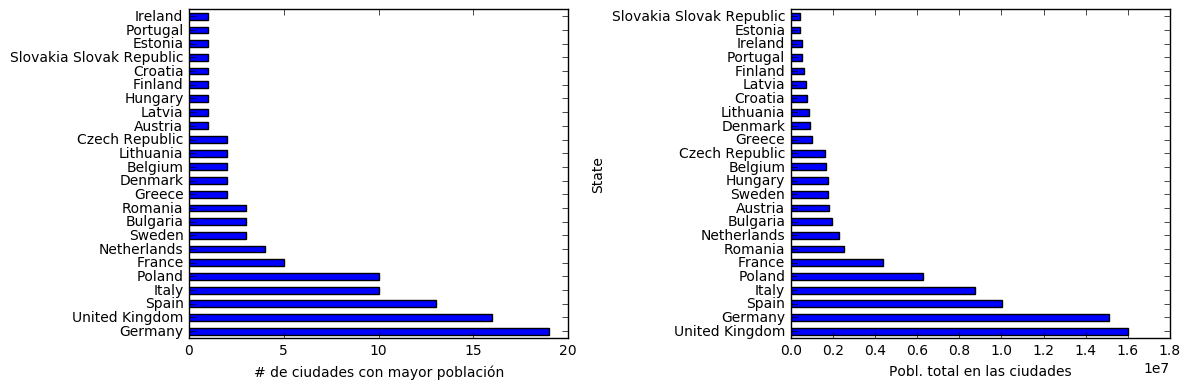

In [78]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

city_counts.plot(kind='barh', ax=ax1)
ax1.set_xlabel(u"# de ciudades con mayor población")
df_pop5bis.NumericPopulation.plot(kind='barh', ax=ax2)
ax2.set_xlabel("Pobl. total en las ciudades")

fig.tight_layout()
fig.savefig("ciudades-mas-pobladas-por-paises.pdf")

## Series temporales

Las series temporales son una forma habitual de datos organizados en periodos regulares o irregulares de tiempo. Con Pandas podemos representarlos fácilmente usando instancias de las clases `Series` o `DataFrame`, donde una de las columnas se indiza usando este tipo de periodos de tiempo, que se puede gestionar adecuadamente gracias al conjunto de índices `DatetimeIndex` o `PeriodIndex`. Así podremos facilmente realizar operaciones y gestionar dichos datos, seleccionando rangos de tiempo, agrupando ciertos periodos o bien muestreando ciertos datos de la serie temporal.

### Teoría básica

In [79]:
import datetime # este módulo contiene distintas clases de objetos y procedimientos
# como ´date_range´ para tratar y manipular datos que dependan de fechas temporales

In [80]:
pd.date_range("2015-1-1", periods=31)  # he aquí un ejemplo que no requiere explicación

DatetimeIndex(['2015-01-01', '2015-01-02', '2015-01-03', '2015-01-04',
               '2015-01-05', '2015-01-06', '2015-01-07', '2015-01-08',
               '2015-01-09', '2015-01-10', '2015-01-11', '2015-01-12',
               '2015-01-13', '2015-01-14', '2015-01-15', '2015-01-16',
               '2015-01-17', '2015-01-18', '2015-01-19', '2015-01-20',
               '2015-01-21', '2015-01-22', '2015-01-23', '2015-01-24',
               '2015-01-25', '2015-01-26', '2015-01-27', '2015-01-28',
               '2015-01-29', '2015-01-30', '2015-01-31'],
              dtype='datetime64[ns]', freq='D')

In [81]:
pd.date_range(datetime.datetime(2015, 1, 1), periods=31)  # exactamente el mismo resultado

DatetimeIndex(['2015-01-01', '2015-01-02', '2015-01-03', '2015-01-04',
               '2015-01-05', '2015-01-06', '2015-01-07', '2015-01-08',
               '2015-01-09', '2015-01-10', '2015-01-11', '2015-01-12',
               '2015-01-13', '2015-01-14', '2015-01-15', '2015-01-16',
               '2015-01-17', '2015-01-18', '2015-01-19', '2015-01-20',
               '2015-01-21', '2015-01-22', '2015-01-23', '2015-01-24',
               '2015-01-25', '2015-01-26', '2015-01-27', '2015-01-28',
               '2015-01-29', '2015-01-30', '2015-01-31'],
              dtype='datetime64[ns]', freq='D')

In [82]:
pd.date_range("2015-1-1 00:00", "2015-1-1 12:00", freq="H")  # ahora con una frecuencia horaria

DatetimeIndex(['2015-01-01 00:00:00', '2015-01-01 01:00:00',
               '2015-01-01 02:00:00', '2015-01-01 03:00:00',
               '2015-01-01 04:00:00', '2015-01-01 05:00:00',
               '2015-01-01 06:00:00', '2015-01-01 07:00:00',
               '2015-01-01 08:00:00', '2015-01-01 09:00:00',
               '2015-01-01 10:00:00', '2015-01-01 11:00:00',
               '2015-01-01 12:00:00'],
              dtype='datetime64[ns]', freq='H')

In [83]:
ts1 = pd.Series(np.arange(31), index=pd.date_range("2015-1-1", periods=31))
# Ahora con esta sentencia generamos una instancia de la clase Series conteniendo estos items
# con fechas diarias como índices, correspondiéndole a cada uno de ellos un número natural
# (empezando eso sí con el 0).

In [84]:
ts1.head()  # veámos por ejemplo los primeros elementos de la serie temporal

2015-01-01    0
2015-01-02    1
2015-01-03    2
2015-01-04    3
2015-01-05    4
Freq: D, dtype: int64

In [85]:
ts1["2015-1-3"]  # de esta manera vemos qué número le corresponde a una fecha concreta

2

In [86]:
ts1.index[2]  
# y así, la fecha asociada al número natural en cuestión dentro de la serie temporal

Timestamp('2015-01-03 00:00:00', offset='D')

In [87]:
ts1.index[2].year, ts1.index[2].month, ts1.index[2].day
# de la cuál podríamos extraer, año, mes y día, a nuestra conveniencia

(2015, 1, 3)

In [88]:
ts1.index[2].nanosecond  # si además tuviéramos tiempo almacenado para dicha fecha
# este se podría llegar a medir en nanosegundos 
# (a diferencia de una instancia de `datetime` que sólo trabajaría con micro-segundos).

0

In [89]:
ts1.index[2].to_pydatetime()  # no obstante, si tuvieramos que convertir una instancia de 
# `Timestamp` en otra de `datetime` el procedimiento `to_pydatetime()` nos sería muy útil.

datetime.datetime(2015, 1, 3, 0, 0)

In [90]:
# Por otro lado, siempre podríamos usar una lista de objetos de tipo `datetime` para
# generar una serie temporal (de la clase `Series` de Pandas).
ts2 = pd.Series(np.random.rand(2), 
                index=[datetime.datetime(2015, 1, 1), datetime.datetime(2015, 2, 1)])

In [91]:
ts2

2015-01-01    0.330267
2015-02-01    0.080943
dtype: float64

In [92]:
periods = pd.PeriodIndex([pd.Period('2015-01'), pd.Period('2015-02'), pd.Period('2015-03')])
# aquí vemos otra manera equivalente para generar ahora tres de esos periodos temporales

In [93]:
ts3 = pd.Series(np.random.rand(3), periods)  
# y usarlos para generar otra serie temporal con valores aleatorios

In [94]:
ts3

2015-01    0.573468
2015-02    0.143897
2015-03    0.569102
Freq: M, dtype: float64

In [95]:
ts3.index  # una manera de obtener los índices temporales considerados

PeriodIndex(['2015-01', '2015-02', '2015-03'], dtype='int64', freq='M')

In [96]:
ts2.to_period('M') # aquí vemos  una manera de obtener periodos mensuales

2015-01    0.330267
2015-02    0.080943
Freq: M, dtype: float64

In [97]:
pd.date_range("2015-1-1", periods=12, freq="M").to_period() # cubriendo todos los meses del año

PeriodIndex(['2015-01', '2015-02', '2015-03', '2015-04', '2015-05', '2015-06',
             '2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12'],
            dtype='int64', freq='M')

### Ejemplo de serie temporal de temperaturas

In [98]:
 !head -n 5 temperature_outdoor_2014.tsv 
#(sólo válido en sistemas tipo Unix)

head: temperature_outdoor_2014.tsv: No such file or directory


In [100]:
df1 = pd.read_csv('temperature_outdoor_2014.tsv', delimiter="\t", names=["tiempo", "exterior"])
# en este caso estamos leyendo los datos desde un fichero .tsv (donde los delimitadores son 
# tabuladores, TAB) 

In [101]:
df2 = pd.read_csv('temperature_indoor_2014.tsv', delimiter="\t", names=["tiempo", "interior"])
# aquí estaríamos leyendo otro fichero como el anterior. Nótese que en ambos casos 
# estamos especificando explícitamente los nombre de las columnas correspondientes.

In [102]:
df1.head()  # Aquí podemos visualizar las primeras líneas leidas en el primer caso

,tiempo,exterior
0,1388530986,4.38
1,1388531586,4.25
2,1388532187,4.19
3,1388532787,4.06
4,1388533388,4.06


In [103]:
df2.head()  # y ahora las primeras líneas leidas en el segundo caso

,tiempo,interior
0,1388530986,21.94
1,1388531586,22.00
2,1388532187,22.00
3,1388532787,22.00
4,1388533388,22.00


In [104]:
# El siguiente paso para una fructífera representación de la serie temporal requiere
# convertir las indicaciones de tiempo proporcionadas por el sistema UNIX en el archivo leído
# en objetos de tipo tiempo que Python pueda gestionar, usando el procedimiento `to_datetime`
# También podemos "localizar" (asignando una zona temporal) mediante `tz_localize` 
# y convirtiendo el correspondiente atributo a la zona deseada.
df1.tiempo = (pd.to_datetime(df1.tiempo.values, unit="s")
              .tz_localize('UTC').tz_convert('Europe/Stockholm'))

In [105]:
df1 = df1.set_index("tiempo")  # aquí indicamos que la columna que queremos usar como índice
# correspondería a la que nos proporciona el tiempo

In [106]:
df2.tiempo = (pd.to_datetime(df2.tiempo.values, unit="s")
              .tz_localize('UTC').tz_convert('Europe/Stockholm'))

In [107]:
df2 = df2.set_index("tiempo")  # usaremos el tiempo como índice en la serie

In [108]:
df1.head()

,exterior
tiempo,
2014-01-01 00:03:06+01:00,4.38
2014-01-01 00:13:06+01:00,4.25
2014-01-01 00:23:07+01:00,4.19
2014-01-01 00:33:07+01:00,4.06
2014-01-01 00:43:08+01:00,4.06


In [109]:
df1.index[0]

Timestamp('2014-01-01 00:03:06+0100', tz='Europe/Stockholm')

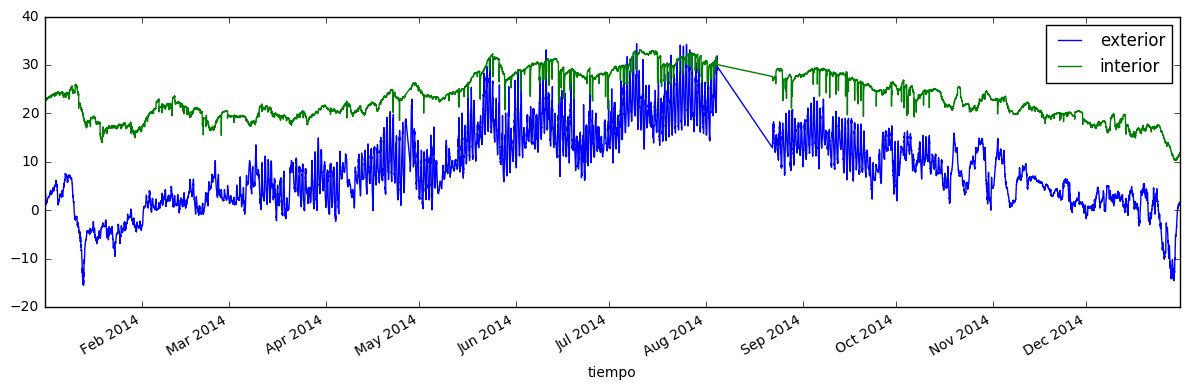

In [110]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
df1.plot(ax=ax)
df2.plot(ax=ax)

fig.tight_layout()
fig.savefig("serietemporal-temperaturas-2014.pdf")

In [111]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 49548 entries, 2014-01-01 00:03:06+01:00 to 2014-12-30 23:56:35+01:00
Data columns (total 1 columns):
exterior    49548 non-null float64
dtypes: float64(1)
memory usage: 774.2 KB


In [112]:
# seleccionaremos ahora datos del mes de Enero
df1_enero = df1[(df1.index > "2014-1-1") & (df1.index < "2014-2-1")]

In [113]:
df1.index < "2014-2-1"

array([ True,  True,  True, ..., False, False, False], dtype=bool)

In [114]:
df1_enero.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4452 entries, 2014-01-01 00:03:06+01:00 to 2014-01-31 23:56:58+01:00
Data columns (total 1 columns):
exterior    4452 non-null float64
dtypes: float64(1)
memory usage: 69.6 KB


In [115]:
df2_enero = df2["2014-1-1":"2014-1-31"]

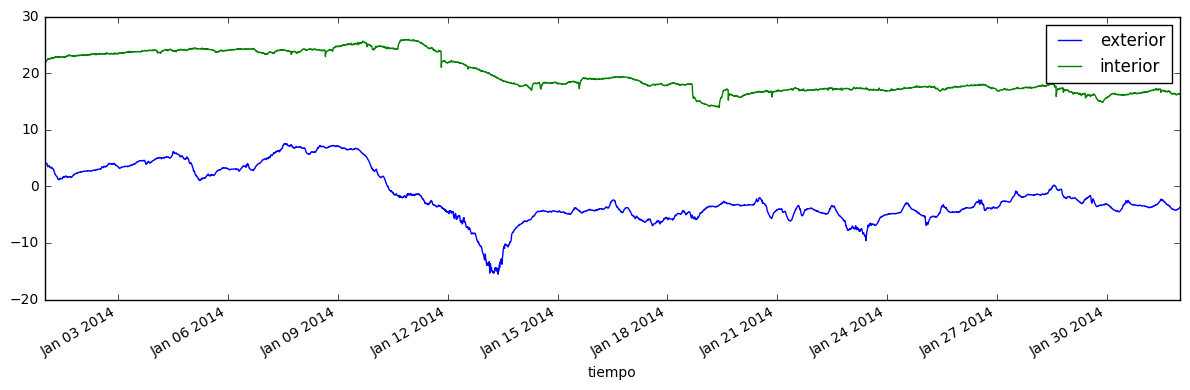

In [116]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))

df1_enero.plot(ax=ax)
df2_enero.plot(ax=ax)

fig.tight_layout()
fig.savefig("serietemporal-mes-seleccionado.pdf")

In [117]:
# agrupando por meses

In [118]:
df1_mes = df1.reset_index()

In [119]:
df1_mes["mes"] = df1_mes.tiempo.apply(lambda x: x.month)

In [120]:
df1_mes.head()

,tiempo,exterior,mes
0,2014-01-01 00:03:06+01:00,4.38,1
1,2014-01-01 00:13:06+01:00,4.25,1
2,2014-01-01 00:23:07+01:00,4.19,1
3,2014-01-01 00:33:07+01:00,4.06,1
4,2014-01-01 00:43:08+01:00,4.06,1


In [121]:
df1_mes = df1_mes.groupby("mes").aggregate(np.mean)

In [122]:
df2_mes = df2.reset_index()

In [123]:
df2_mes["mes"] = df2_mes.tiempo.apply(lambda x: x.month)

In [124]:
df2_mes = df2_mes.groupby("mes").aggregate(np.mean)

In [125]:
df_mes = df1_mes.join(df2_mes)

In [126]:
df_mes.head(3)

,exterior,interior
mes,,
1,-1.776646,19.862590
2,2.231613,20.231507
3,4.615437,19.597748


In [127]:
df_mes = pd.concat([df.to_period("M").groupby(level=0).mean() for df in [df1, df2]], axis=1)

In [128]:
df_mes.head(3)

,exterior,interior
tiempo,,
2014-01,-1.776646,19.862590
2014-02,2.231613,20.231507
2014-03,4.615437,19.597748


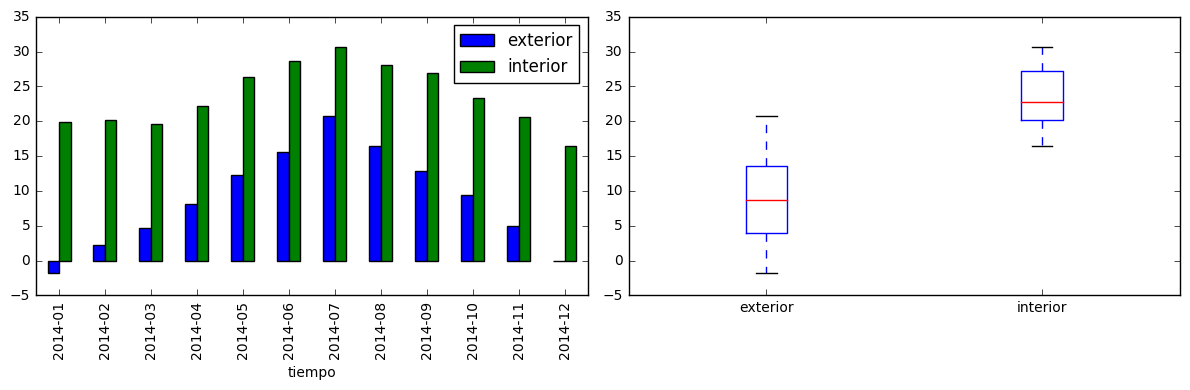

In [129]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

df_mes.plot(kind='bar', ax=axes[0])
df_mes.plot(kind='box', ax=axes[1])

fig.tight_layout()
fig.savefig("datos-agrupados-por-meses.pdf")

In [130]:
df_mes

,exterior,interior
tiempo,,
2014-01,-1.776646,19.862590
2014-02,2.231613,20.231507
2014-03,4.615437,19.597748
2014-04,8.105193,22.149754
2014-05,12.261396,26.332160
2014-06,15.586955,28.687491
2014-07,20.780314,30.605333
2014-08,16.494823,28.099068
2014-09,12.823905,26.950366


In [131]:
# remuestreo
# df1_hora = df1.resample("H")    # Python 2
df1_hora = df1.resample("H") .mean()

In [132]:
df1_hora.columns = ["fuera (promediado por horas)"]

In [133]:
# df1_dia = df1.resample("D")    # Python 2
df1_dia = df1.resample("D").mean()

In [134]:
df1_dia.columns = ["fuera (promed. por dias)"]

In [135]:
# df1_semana = df1.resample("7D")    # Python 2
df1_semana = df1.resample("7D").mean()    

In [136]:
df1_semana.columns = ["fuera (promed. por semanas)"]

In [137]:
# df1_mes = df1.resample("M")    # Python 2
df1_mes = df1.resample("M").mean()

In [138]:
df1_mes.columns = ["fuera (promed. por meses)"]

In [139]:
# df_diferencia = (df1.resample("D").exterior - df2.resample("D").interior)    # Python 2
df_diferencia = (df1.resample("D").mean().exterior - df2.resample("D").mean().interior)

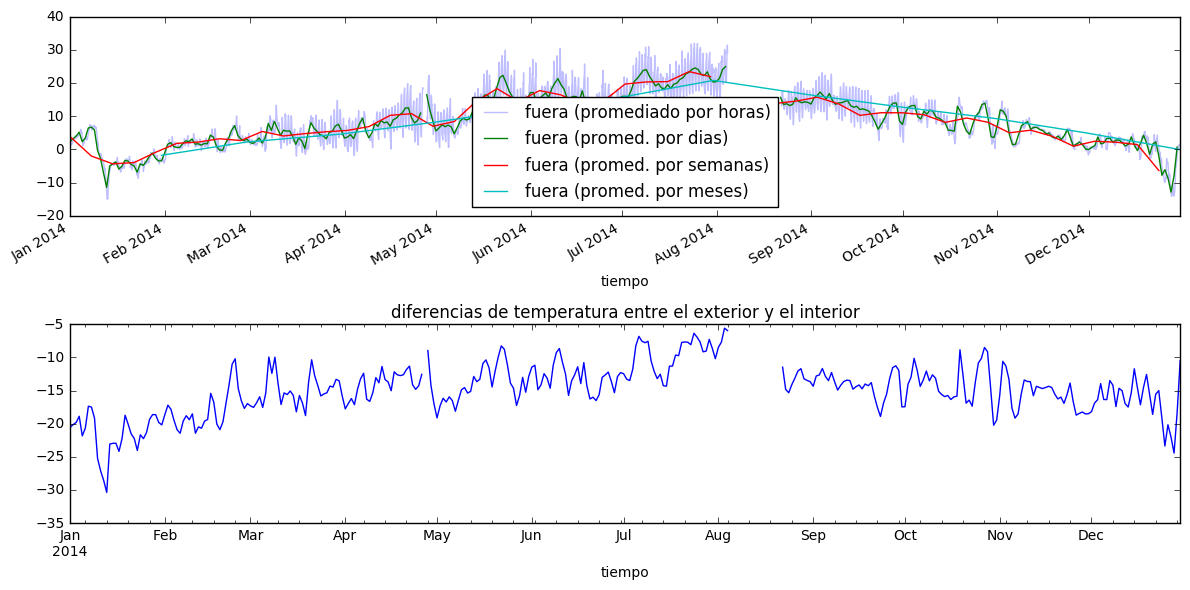

In [140]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 6))

df1_hora.plot(ax=ax1, alpha=0.25)
df1_dia.plot(ax=ax1)
df1_semana.plot(ax=ax1)
df1_mes.plot(ax=ax1)

df_diferencia.plot(ax=ax2)
ax2.set_title("diferencias de temperatura entre el exterior y el interior")

fig.tight_layout()
fig.savefig("serietemporal-remuestreada.pdf")

In [141]:
fill_methods = [None, 'ffill', 'bfill']  # distintas posibilidades para rellenar datos ausentes

In [198]:
pd.concat([df1.resample("5min", fill_method=fm).rename(columns={"exterior": fm})
           for fm in fill_methods], axis=1).head()

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: .resample() is now a deferred operation
use .resample(...).mean() instead of .resample(...)
  from ipykernel import kernelapp as app
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: fill_method is deprecated to .resample()
the new syntax is .resample(...).ffill()
  from ipykernel import kernelapp as app
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: fill_method is deprecated to .resample()
the new syntax is .resample(...).bfill()
  from ipykernel import kernelapp as app


,outdoor,outdoor,outdoor
time,,,
2014-01-01 00:00:00+01:00,4.38,4.38,4.38
2014-01-01 00:05:00+01:00,NaN,4.38,4.25
2014-01-01 00:10:00+01:00,4.25,4.25,4.25
2014-01-01 00:15:00+01:00,NaN,4.25,4.19
2014-01-01 00:20:00+01:00,4.19,4.19,4.19


In [170]:
pd.concat([df1.resample("5min", fill_method=fm).ffill().rename(columns={"exterior": fm})
           for fm in fill_methods], axis=1).head()

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: fill_method is deprecated to .resample()
the new syntax is .resample(...).ffill()
  from ipykernel import kernelapp as app
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: fill_method is deprecated to .resample()
the new syntax is .resample(...).bfill()
  from ipykernel import kernelapp as app


,outdoor,outdoor,outdoor
time,,,
2014-01-01 00:00:00+01:00,4.38,4.38,4.38
2014-01-01 00:05:00+01:00,4.38,4.38,4.25
2014-01-01 00:10:00+01:00,4.25,4.25,4.25
2014-01-01 00:15:00+01:00,4.25,4.25,4.19
2014-01-01 00:20:00+01:00,4.19,4.19,4.19


## Día seleccionado

In [171]:
df1_dic25 = df1[(df1.index < "2014-9-1") & (df1.index >= "2014-8-1")].resample("D")

In [172]:
df1_dic25 = df1.ix["2014-12-25"]

In [173]:
df1_dic25.head(5)

,outdoor
time,
2014-12-25 00:00:00+01:00,-4.88
2014-12-25 00:10:00+01:00,-4.94
2014-12-25 00:20:00+01:00,-5.06
2014-12-25 00:30:00+01:00,-5.06
2014-12-25 00:40:00+01:00,-5.12


In [174]:
df2_dic25 = df2.ix["2014-12-25"]

In [175]:
df2_dic25.head(5)

,indoor
time,
2014-12-25 00:00:00+01:00,16.31
2014-12-25 00:10:00+01:00,16.25
2014-12-25 00:20:00+01:00,16.31
2014-12-25 00:30:00+01:00,16.31
2014-12-25 00:40:00+01:00,16.25


In [176]:
df1_dic25.describe().T

,count,mean,std,min,25%,50%,75%,max
outdoor,144.0,-7.788819,1.456085,-10.06,-9.075,-7.75,-6.8625,-4.88


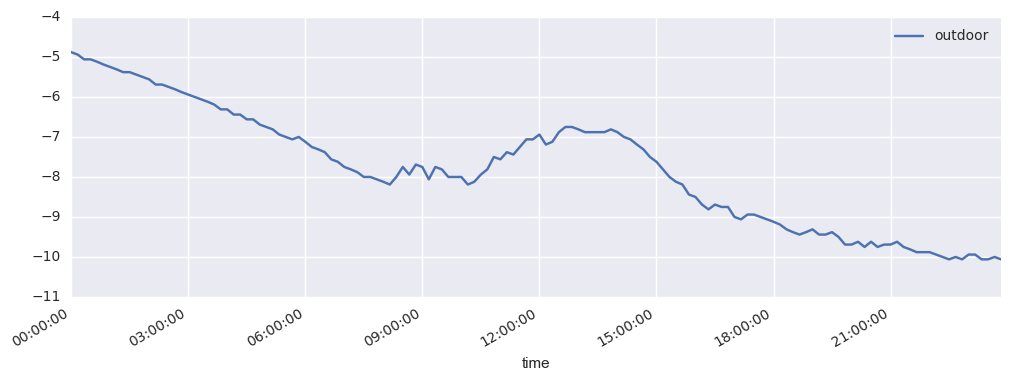

In [177]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))

df1_dic25.plot(ax=ax)

fig.savefig("cap12-serietemporal-mesydia-seleccionado.pdf")

In [178]:
df1.index

DatetimeIndex(['2014-01-01 00:00:00+01:00', '2014-01-01 00:10:00+01:00',
               '2014-01-01 00:20:00+01:00', '2014-01-01 00:30:00+01:00',
               '2014-01-01 00:40:00+01:00', '2014-01-01 00:50:00+01:00',
               '2014-01-01 01:00:00+01:00', '2014-01-01 01:10:00+01:00',
               '2014-01-01 01:20:00+01:00', '2014-01-01 01:30:00+01:00',
               ...
               '2014-12-30 22:20:00+01:00', '2014-12-30 22:30:00+01:00',
               '2014-12-30 22:40:00+01:00', '2014-12-30 22:50:00+01:00',
               '2014-12-30 23:00:00+01:00', '2014-12-30 23:10:00+01:00',
               '2014-12-30 23:20:00+01:00', '2014-12-30 23:30:00+01:00',
               '2014-12-30 23:40:00+01:00', '2014-12-30 23:50:00+01:00'],
              dtype='datetime64[ns, Europe/Stockholm]', name='time', length=52416, freq='10T')

# Biblioteca de visualización estadística Seaborn

In [179]:
import seaborn as sns

In [180]:
sns.set(style="darkgrid")

In [181]:
#sns.set(style="whitegrid")

In [182]:
df1 = pd.read_csv('temperature_outdoor_2014.tsv', delimiter="\t", names=["time", "outdoor"])
df1.time = pd.to_datetime(df1.time.values, unit="s").tz_localize('UTC').tz_convert('Europe/Stockholm')
df1 = df1.set_index("time").resample("10min").mean()
df2 = pd.read_csv('temperature_indoor_2014.tsv', delimiter="\t", names=["time", "indoor"])
df2.time = pd.to_datetime(df2.time.values, unit="s").tz_localize('UTC').tz_convert('Europe/Stockholm')
df2 = df2.set_index("time").resample("10min").mean()
df_temp = pd.concat([df1, df2], axis=1)

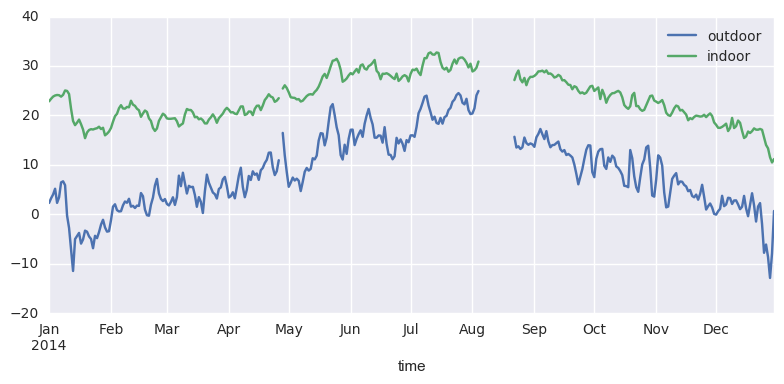

In [183]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
df_temp.resample("D").mean().plot(y=["outdoor", "indoor"], ax=ax)
fig.tight_layout()
fig.savefig("seaborn-plot.pdf")

In [184]:
#sns.kdeplot(df_temp["outdoor"].dropna().values, shade=True, cumulative=True);

//anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


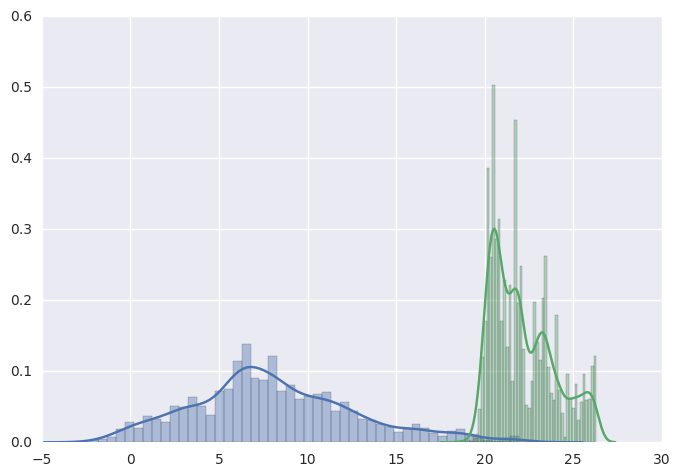

In [185]:
sns.distplot(df_temp.to_period("M")["outdoor"]["2014-04"].dropna().values, bins=50);
sns.distplot(df_temp.to_period("M")["indoor"]["2014-04"].dropna().values, bins=50);

plt.savefig("seaborn-distplot.pdf")

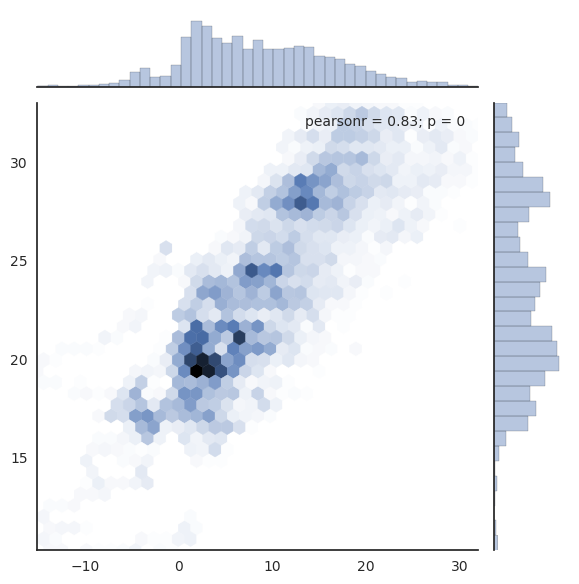

In [186]:
with sns.axes_style("white"):
    sns.jointplot(df_temp.resample("H").mean()["outdoor"].values,
                  df_temp.resample("H").mean()["indoor"].values, kind="hex");
    
plt.savefig("seaborn-jointplot.pdf")

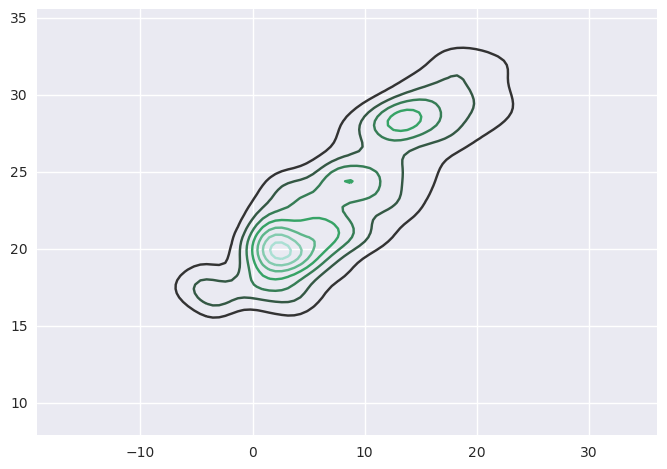

In [187]:
sns.kdeplot(df_temp.resample("H").mean()["outdoor"].dropna().values,
            df_temp.resample("H").mean()["indoor"].dropna().values, shade=False);

plt.savefig("seaborn-kdeplot.pdf")

//anaconda/lib/python3.5/site-packages/seaborn/categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)
//anaconda/lib/python3.5/site-packages/seaborn/categorical.py:2342: UserWarning: The violinplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


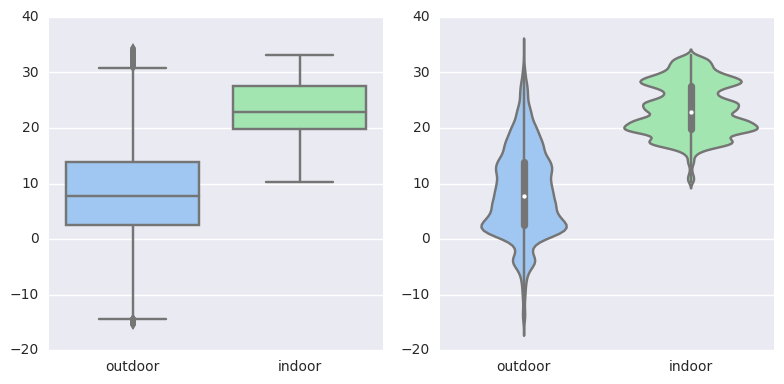

In [188]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

sns.boxplot(df_temp.dropna(), ax=ax1, palette="pastel")
sns.violinplot(df_temp.dropna(), ax=ax2, palette="pastel")

fig.tight_layout()
fig.savefig("seaborn-boxplot-violinplot.pdf")

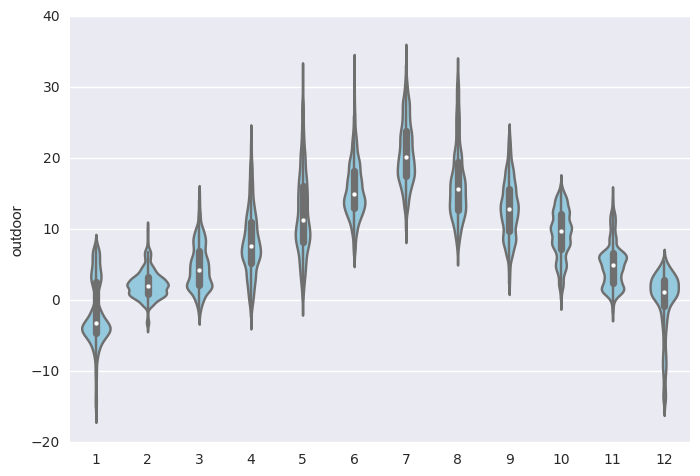

In [189]:
sns.violinplot(x=df_temp.dropna().index.month, y=df_temp.dropna().outdoor, color="skyblue");

plt.savefig("seaborn-violinplot.pdf")

In [190]:
df_temp["month"] = df_temp.index.month
df_temp["hour"] = df_temp.index.hour

In [191]:
df_temp.head()

,outdoor,indoor,month,hour
time,,,,
2014-01-01 00:00:00+01:00,4.38,21.94,1,0
2014-01-01 00:10:00+01:00,4.25,22.00,1,0
2014-01-01 00:20:00+01:00,4.19,22.00,1,0
2014-01-01 00:30:00+01:00,4.06,22.00,1,0
2014-01-01 00:40:00+01:00,4.06,22.00,1,0


In [192]:
table = pd.pivot_table(df_temp, values='outdoor', index=['month'], columns=['hour'], aggfunc=np.mean)

In [193]:
table

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
month,,,,,,,,,,,,,,,,,,,,,
1,-1.692312,-1.750162,-1.826649,-1.879086,-1.922527,-1.968065,-2.020914,-2.035806,-2.101774,-2.001022,...,-1.457849,-1.696935,-1.814194,-1.812258,-1.853297,-1.898432,-1.839730,-1.806486,-1.854462,-1.890811
2,1.613690,1.521190,1.479405,1.464371,1.506407,1.485595,1.499167,1.516946,1.669226,2.067725,...,3.573593,3.360741,2.939390,2.501607,2.357425,2.236190,2.204458,2.137619,2.024671,1.896190
3,3.192366,2.866774,2.628000,2.524140,2.384140,2.235538,2.243387,2.622258,3.419301,4.466290,...,7.790323,7.930914,7.595892,6.770914,5.731508,4.983784,4.437419,4.022312,3.657903,3.407258
4,5.832738,5.336012,4.926667,4.597059,4.380000,4.109769,4.123699,4.741437,5.878035,7.272299,...,12.175556,12.500059,12.494483,12.361156,11.989240,10.454881,8.857619,7.712619,6.974762,6.293512
5,9.792204,9.369351,9.009839,8.670914,8.463387,8.446919,8.772324,9.562742,10.723622,12.047717,...,15.542581,15.744624,15.784839,15.799570,17.009892,15.685161,13.632796,12.216290,11.291237,10.622849
6,13.209556,12.792889,12.382889,11.967889,11.735778,11.886667,12.503778,13.338167,14.343444,15.665475,...,18.630556,18.866292,18.680611,18.529832,20.057877,18.853389,16.969777,15.675111,14.658778,13.898167
7,17.956344,17.348641,16.793152,16.309892,16.001559,15.986774,16.506613,17.478226,18.850054,20.533763,...,24.598441,25.030000,24.869194,24.764409,26.155161,24.896505,22.550269,20.882649,19.699022,18.822634
8,14.498205,13.960128,13.555128,12.995641,12.651410,12.485974,12.680130,13.403506,14.578780,16.170833,...,20.473810,20.292381,20.328795,19.642436,19.373846,18.713462,17.034872,15.843590,15.146154,14.596667
9,11.133000,10.725667,10.362444,9.976833,9.729333,9.503944,9.357500,9.689778,10.600778,11.829106,...,16.336983,16.828268,17.031056,16.786983,15.853556,14.534637,13.350444,12.545278,11.954190,11.399056


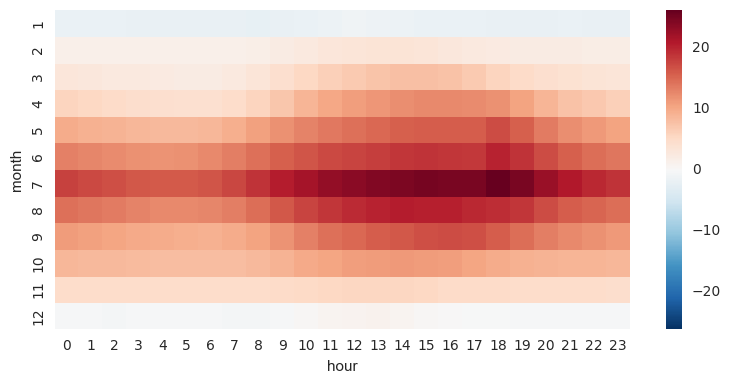

In [194]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
sns.heatmap(table, ax=ax);

fig.tight_layout()
fig.savefig("seaborn-heatmap.pdf")

## Versiones

In [195]:
%reload_ext version_information

In [196]:
%version_information numpy, matplotlib, pandas, seaborn

Software versions
Python 3.5.2 64bit [GCC 4.2.1 Compatible Apple LLVM 4.2 (clang-425.0.28)]
IPython 5.1.0
OS Darwin 14.5.0 x86_64 i386 64bit
numpy 1.11.1
matplotlib 1.5.3
pandas 0.18.1
seaborn 0.7.1
Fri May 04 14:28:33 2018 CEST